In [66]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import zipfile as zf
import re

In [67]:
def extract(path, filename):
    archive = zf.ZipFile(path)
    file = archive.open(filename)
    return file

In [68]:
def null_filter(list): 
    count = list.count(np.nan) 
    for i in range(count): 
        list.remove(np.nan) 
    return list 

In [69]:
def find_languages(list):
    languages = []
    responses = null_filter(list)
    for response in responses:
        temp_languages = re.findall("[^;]+", response)
        for language in temp_languages:
            languages.append(language)
    return languages

In [70]:
dicts = []
for i in range(2019, 2024):
    df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
    languages = []
    if i in range(2019, 2021):
        df = df['LanguageWorkedWith']
    else:
        df = df['LanguageHaveWorkedWith']
    for language in find_languages(df.tolist()):
        languages.append(language)
        
    language_counts = list(set(languages))
    language_counts = dict.fromkeys(languages)
    for key in language_counts:
        language_counts[key] = 0
        
    for key in language_counts:    
        for language in languages:
            if language == key:
                language_counts[key] += 1
                
    dicts.append(language_counts)

In [71]:
respondant_counts = list()
for i in range(2019, 2024):
    df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
    respondant_counts.append(df.shape[0])

In [72]:
years = list(range(2019,2024))

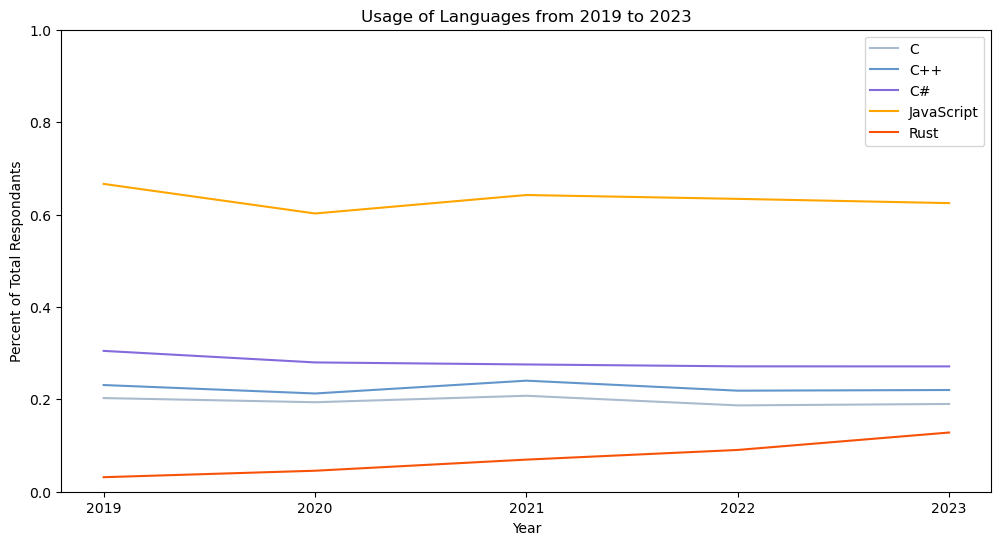

In [73]:
c_sharp_users = []
for i in range(5):
    c_sharp_users.append(dicts[i]['C#']/respondant_counts[i])
c_plus_plus_users = []
for i in range(5):
    c_plus_plus_users.append(dicts[i]['C++']/respondant_counts[i])
c_users = []
for i in range(5):
    c_users.append(dicts[i]['C']/respondant_counts[i])
javascript_users = []
for i in range(5):
    javascript_users.append(dicts[i]['JavaScript']/respondant_counts[i])
rust_users = []
for i in range(5):
    rust_users.append(dicts[i]['Rust']/respondant_counts[i])
    
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(years, c_users, label='C', color='#aabbce')
ax.plot(years, c_plus_plus_users, label='C++', color='#6295cb')
ax.plot(years, c_sharp_users, label='C#', color='#846adb')
ax.plot(years, javascript_users, label='JavaScript', color='orange')
ax.plot(years, rust_users, label='Rust', color='#f75208')

ax.set_title('Usage of Languages from 2019 to 2023')
ax.set_xlabel('Year')
ax.set_ylabel('Percent of Total Respondants')
ax.set_ylim(0, 1)
ax.set_xticks(years)

ax.legend()
plt.show()

In [74]:
dicts = []
for i in range(2019, 2024):
    df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
    languages = []
    if i in range(2019, 2021):
        df = df['LanguageDesireNextYear']
    else:
        df = df['LanguageWantToWorkWith']
    for language in find_languages(df.tolist()):
        languages.append(language)
    language_counts = list(set(languages))
    language_counts = dict.fromkeys(languages)
    for key in language_counts:
        language_counts[key] = 0
    for key in language_counts:    
        for language in languages:
            if language == key:
                language_counts[key] += 1
    dicts.append(language_counts)

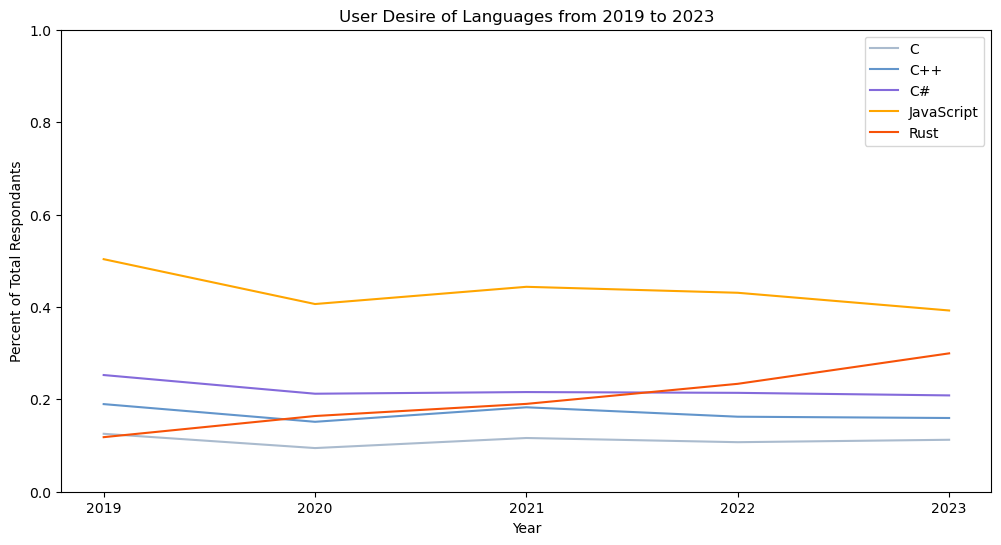

In [75]:
desired_c_sharp_users = []
for i in range(5):
    desired_c_sharp_users.append(dicts[i]['C#']/respondant_counts[i])
desired_c_plus_plus_users = []
for i in range(5):
    desired_c_plus_plus_users.append(dicts[i]['C++']/respondant_counts[i])
desired_c_users = []
for i in range(5):
    desired_c_users.append(dicts[i]['C']/respondant_counts[i])
desired_javascript_users = []
for i in range(5):
    desired_javascript_users.append(dicts[i]['JavaScript']/respondant_counts[i])
desired_rust_users = []
for i in range(5):
    desired_rust_users.append(dicts[i]['Rust']/respondant_counts[i])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(years, desired_c_users, label='C', color='#aabbce')
ax.plot(years, desired_c_plus_plus_users, label='C++', color='#6295cb')
ax.plot(years, desired_c_sharp_users, label='C#', color='#846adb')
ax.plot(years, desired_javascript_users, label='JavaScript', color='orange')
ax.plot(years, desired_rust_users, label='Rust', color='#f75208')

ax.set_title('User Desire of Languages from 2019 to 2023')
ax.set_xlabel('Year')
ax.set_ylabel('Percent of Total Respondants')
ax.set_ylim(0, 1)
ax.set_xticks(years)
ax.legend(loc=1)

plt.show()

In [76]:
def find_average_us_salary(language):
    pays = []
    for i in range(2019, 2024):
        if i in range(2019, 2021):pays = []
    for i in range(2019, 2024):
        if i in range(2019, 2021):
            column_name = 'LanguageWorkedWith'
        else:
            column_name = 'LanguageHaveWorkedWith'
        df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
        df[column_name] = df[column_name].fillna('')
        df['CompTotal'] = df['CompTotal'].fillna(0)
        df = df[df[column_name].str.contains(language)]
        df = df[df['Country'].str.contains('United States')]
        for pay in df['CompTotal'].tolist():
            pays.append(pay)
    count = pays.count(0)
    for i in range(count):
        pays.remove(0)
    for pay in pays:
        if pay > 1000000:
            pays.remove(pay)
    return np.average(pays)

In [77]:
pays = []
for i in range(2019, 2024):
    if i in range(2019, 2021):
        column_name = 'LanguageWorkedWith'
    else:
        column_name = 'LanguageHaveWorkedWith'
    df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
    df[column_name] = df[column_name].fillna('')
    df['CompTotal'] = df['CompTotal'].fillna(0)
    df = df[df[column_name].str.contains('Rust')]
    df = df[df['Country'].str.contains('United States')]
    for pay in df['CompTotal'].tolist():
        pays.append(pay)
count = pays.count(0)
for i in range(count):
    pays.remove(0)
for pay in pays:
    if pay > 1000000:
        pays.remove(pay)

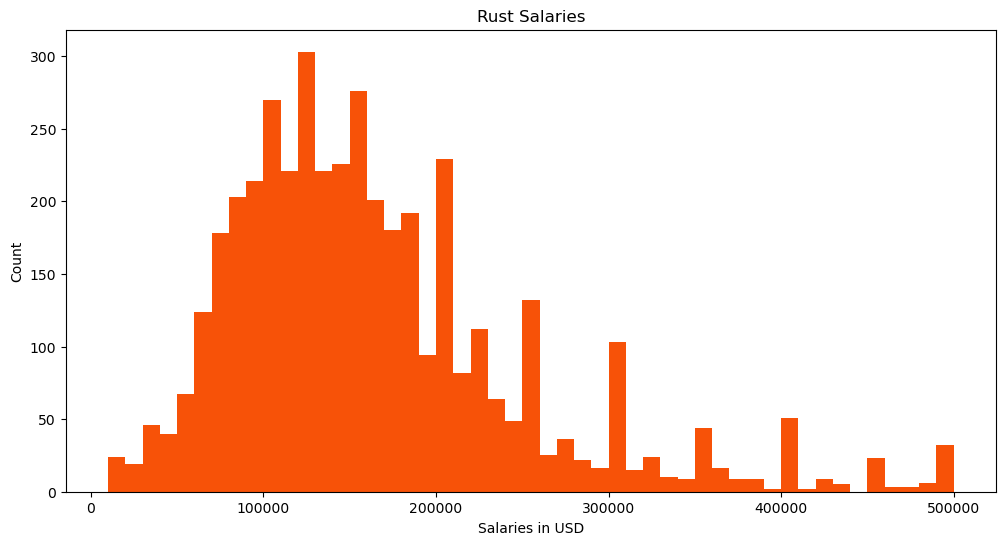

In [115]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
bins = []
for i in range(50):
    bins.append((i+1) * 10000)
ax.hist(pays, bins=bins, color='#f75208')
ax.set_xlabel('Salaries in USD')
ax.set_ylabel('Count')
ax.set_title('Rust Salaries')
plt.show()

In [79]:
languages = ['JavaScript', 'Rust', 'C', 'C++', 'C#']
avg_salaries = []
colors = ['orange', '#f75208', '#aabbce', '#6295cb', '#846adb']
for language in languages:
    avg_salaries.append(find_average_us_salary(language))

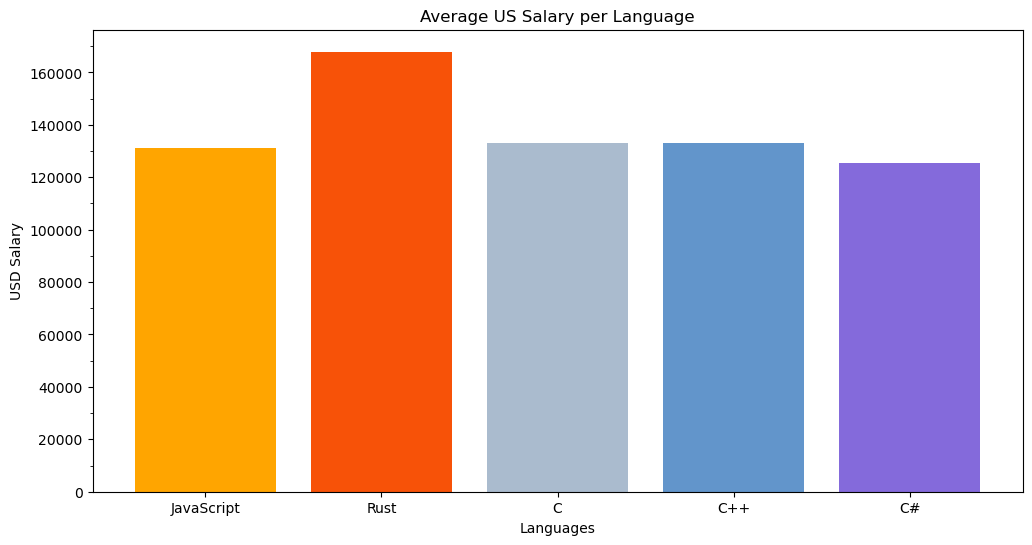

In [80]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.bar(languages, avg_salaries, color=colors)
ax.set_xlabel('Languages')
ax.set_ylabel('USD Salary')
ax.set_title('Average US Salary per Language')
ax.yaxis.set_major_locator(ticker.MultipleLocator(20000))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10000))
plt.show()

# Rust Desire

In [82]:
rust_admire_counts = []
rust_user_counts = []
for i in range(2019, 2024):
    df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
    languages = []
    if i in range(2019, 2021):
        column_name = 'LanguageWorkedWith'
        desire_column_name = 'LanguageDesireNextYear'
    else:
        column_name = 'LanguageHaveWorkedWith'
        desire_column_name = 'LanguageWantToWorkWith'
    df[column_name] = df[column_name].fillna('')
    df = df[df[column_name].str.contains('Rust')]
    rust_user_counts.append(df.shape[0])
    df[desire_column_name] = df[desire_column_name].fillna('')
    df = df[df[desire_column_name].str.contains('Rust')]
    rust_admire_counts.append(df.shape[0])

In [83]:
javascript_admire_counts = []
javascript_user_counts = []
for i in range(2019, 2024):
    df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
    languages = []
    if i in range(2019, 2021):
        column_name = 'LanguageWorkedWith'
        desire_column_name = 'LanguageDesireNextYear'
    else:
        column_name = 'LanguageHaveWorkedWith'
        desire_column_name = 'LanguageWantToWorkWith'
    df[column_name] = df[column_name].fillna('')
    df = df[df[column_name].str.contains('JavaScript')]
    javascript_user_counts.append(df.shape[0])
    df[desire_column_name] = df[desire_column_name].fillna('')
    df = df[df[desire_column_name].str.contains('JavaScript')]
    javascript_admire_counts.append(df.shape[0])

In [84]:
normalized_rust_admire_counts = []
for i in range(5):
    normalized_rust_admire_counts.append(rust_admire_counts[i] / rust_user_counts[i])
normalized_javascript_admire_counts = []
for i in range(5):
    normalized_javascript_admire_counts.append(javascript_admire_counts[i] / javascript_user_counts[i])

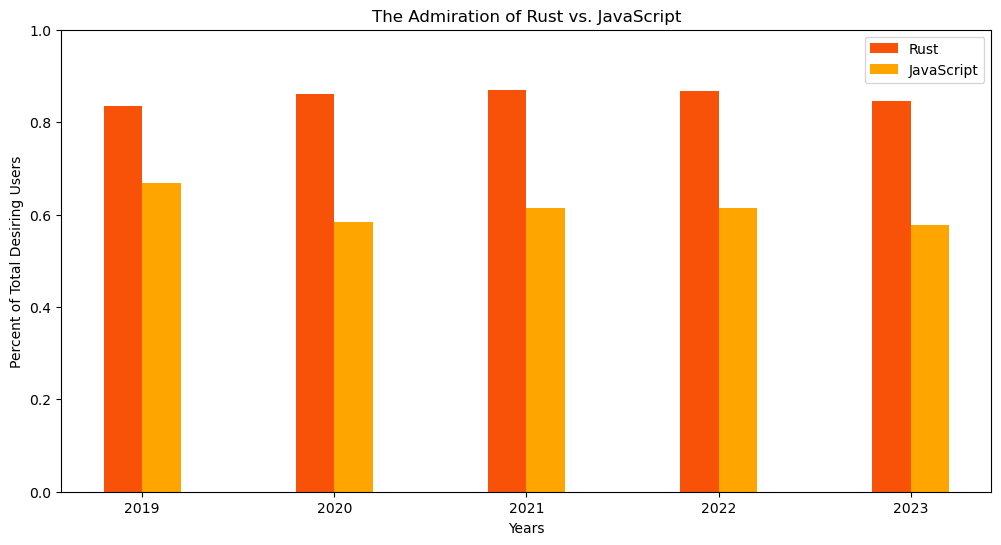

In [111]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
x_axis = np.arange(len(years))
ax.bar(x_axis - 0.1, normalized_rust_admire_counts, width=0.2, label='Rust', color='#f75208')
ax.bar(x_axis + 0.1, normalized_javascript_admire_counts, width=0.2, label='JavaScript', color='orange')
ax.set_xlabel('Years')
ax.set_ylabel('Percent of Total Desiring Users')
ax.set_title('The Admiration of Rust vs. JavaScript')
ax.set_xticks(x_axis, years)
ax.set_ylim(0, 1)
ax.legend()
plt.show()

In [86]:
print(str(round(rust_admire_counts[4] / rust_user_counts[4] * 100, 1)) + '%')

84.7%
